Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

In [70]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [71]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [72]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [74]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [75]:
df.ndim #returns dimensions

2

In [76]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [77]:
# #adding the new_feul coloumn woth the values for petrol:0 and so on


# x= df.fuel.replace ({"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})
# df.insert(4, 'new_fuel', x)


In [78]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [80]:
# df_new = df.drop(columns=['new_fuel'], inplace=True)

In [81]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [55]:
# df.columns.get_loc('new_fuel')


In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [84]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [85]:
df['current_year'] = 2025

In [86]:
df['no_of_years'] = df['current_year'] - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2025,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2025,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2025,13
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2025,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2025,11


In [87]:
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [61]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years,current_year
0,60000,70000,4,1,1,0,18,2025
1,135000,50000,4,1,1,0,18,2025
2,600000,100000,1,1,1,0,13,2025
3,250000,46000,4,1,1,0,8,2025
4,450000,141000,1,1,1,2,11,2025


In [88]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

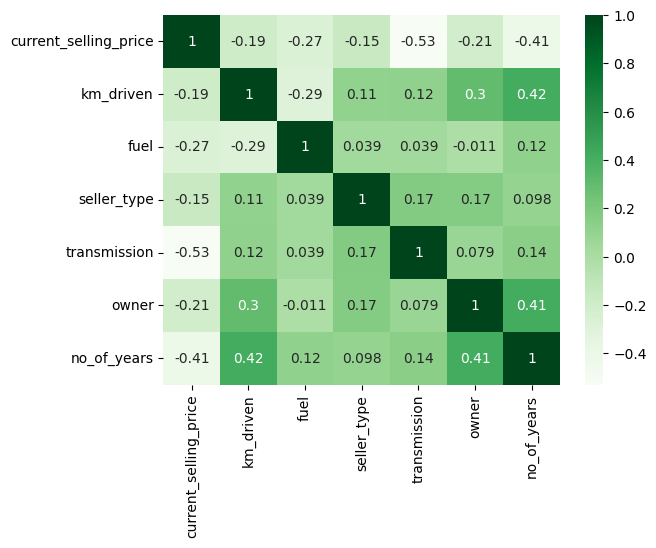

In [97]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

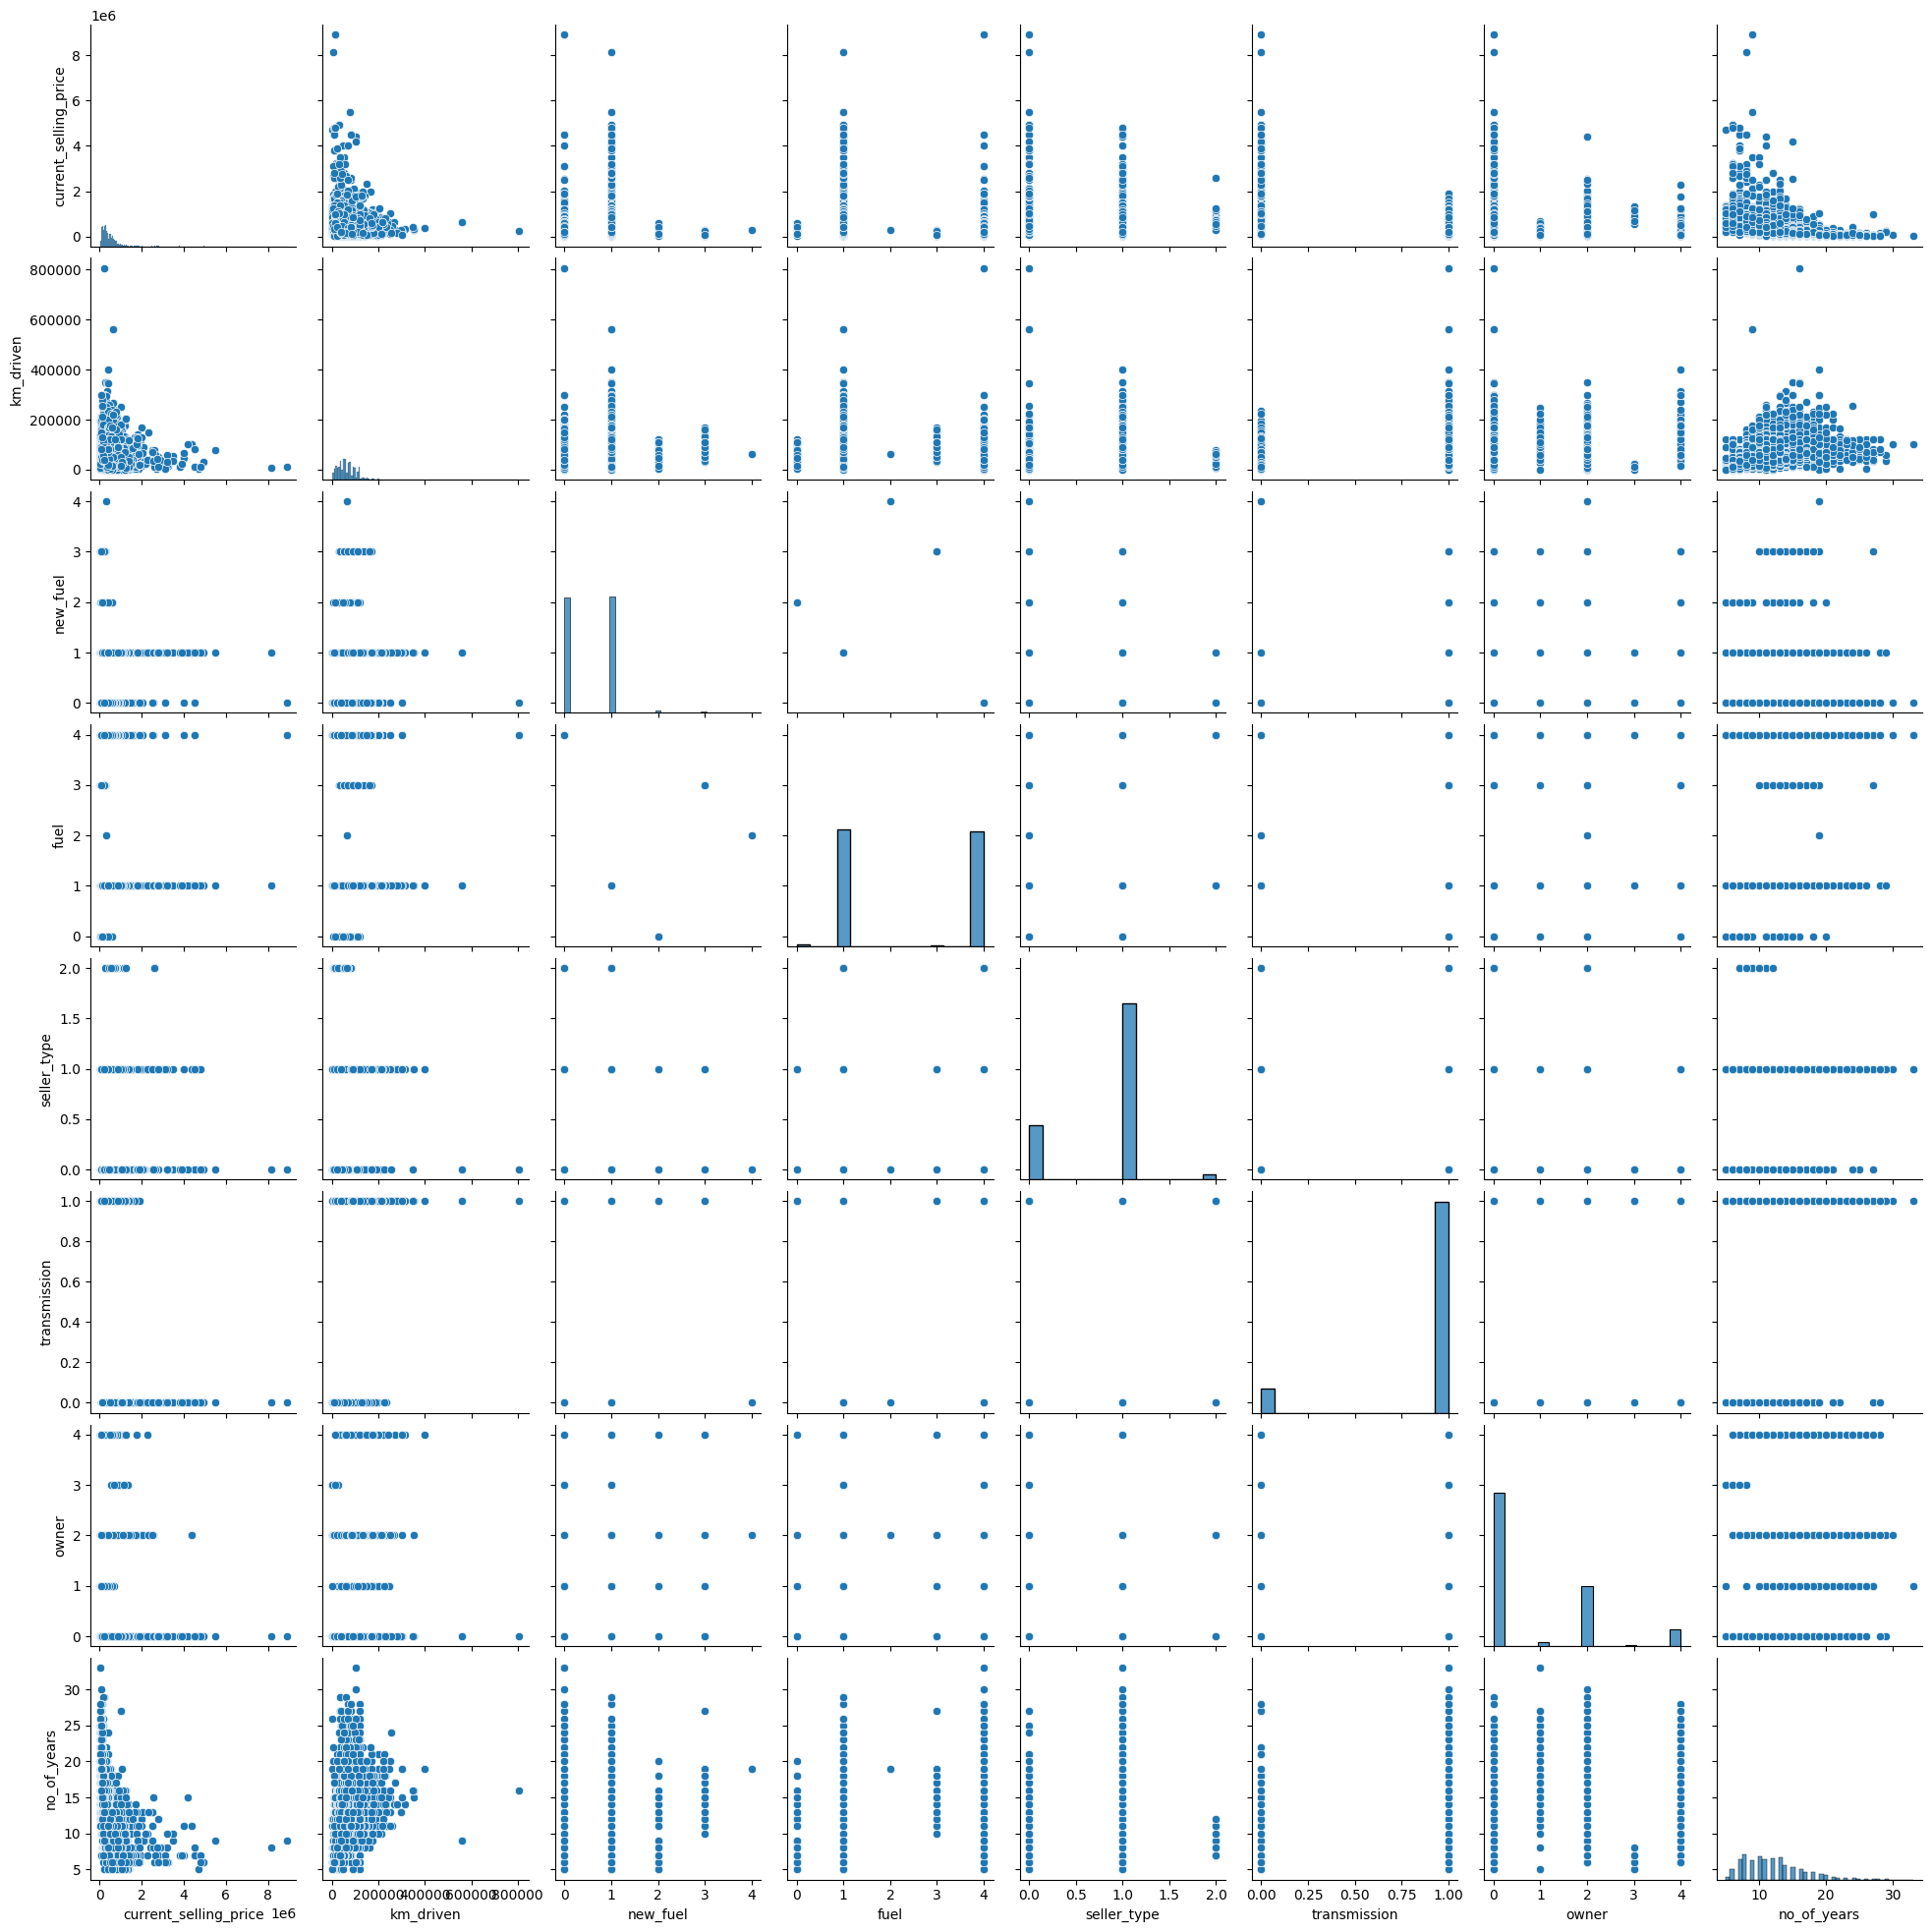

In [24]:
sns.pairplot(df)

<Axes: >

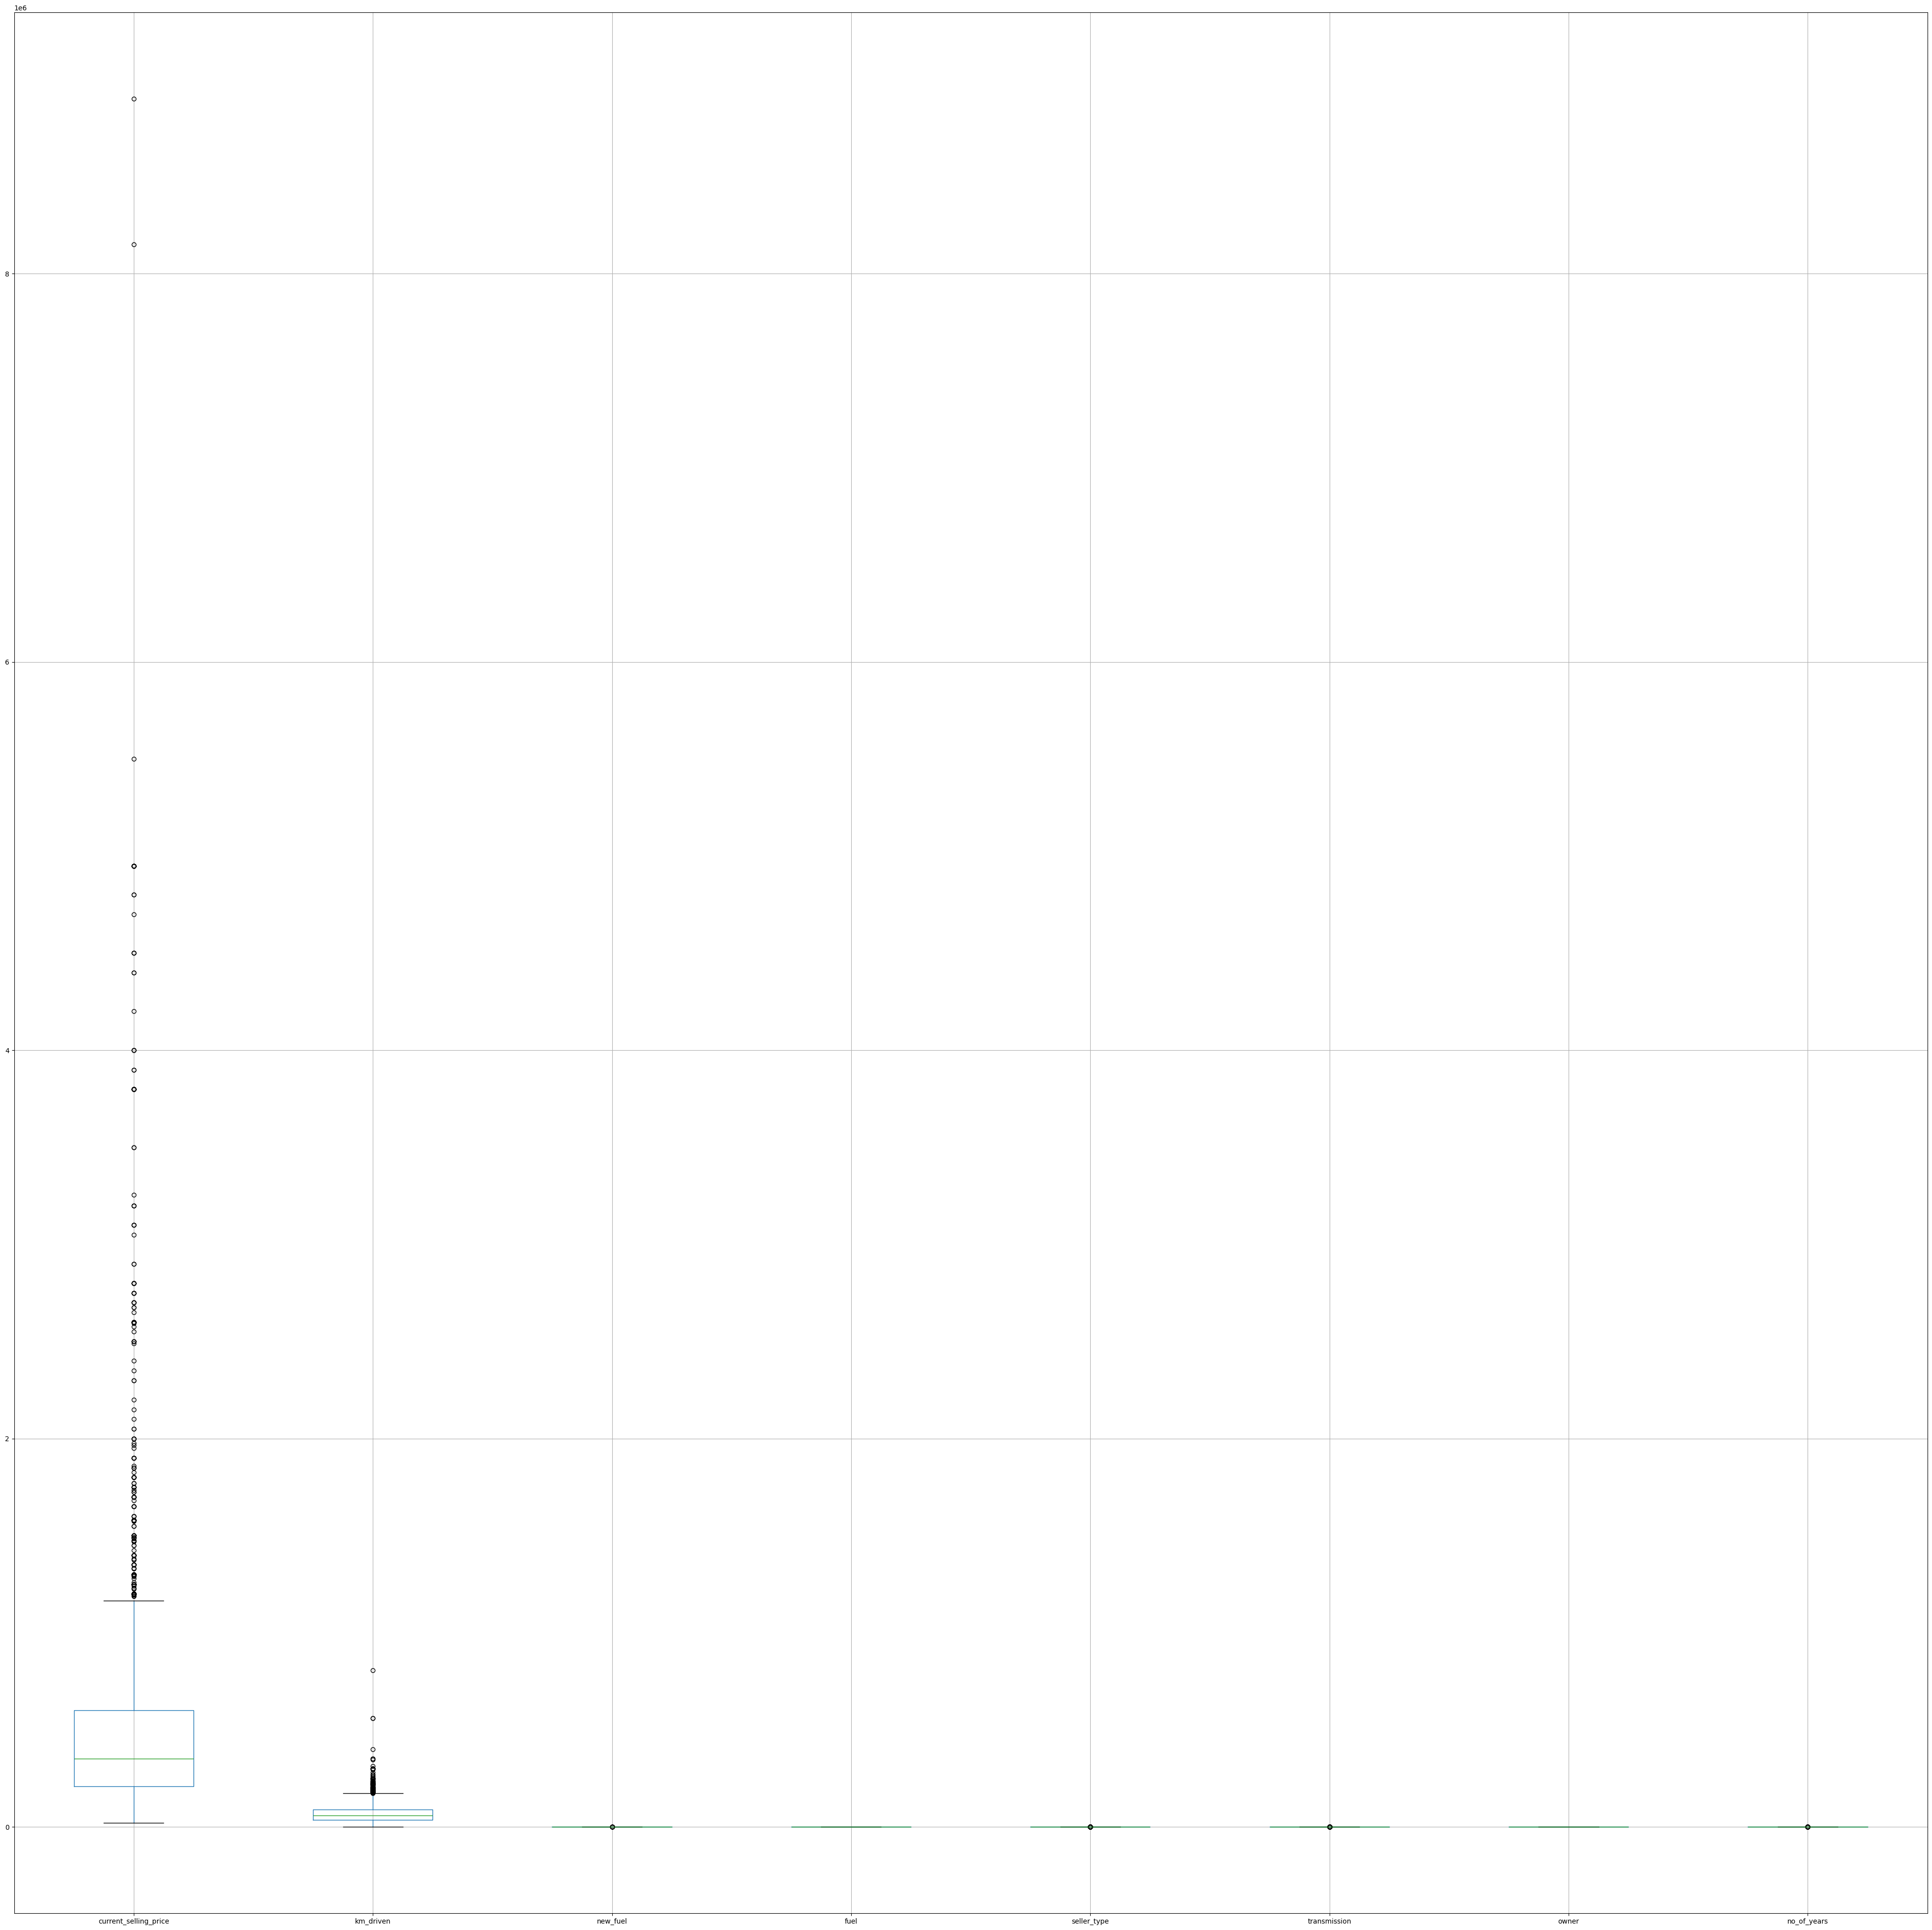

In [25]:
plt.figure(figsize=(50,50))
df.boxplot()

# Select the features and targets




In [89]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

# Spliting the data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [91]:
len(X_train)

3472

In [37]:
# abcd = [x for i in np.linspace(100,1200,12)]

In [38]:
# param = {
#     'ccp_alpha' : abcd
# }

Chosing the model


In [92]:
regressor=DecisionTreeRegressor()

Training the model

In [93]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [94]:
y_pred = regressor.predict(X_test)

Testing the model

In [98]:
target = pd.DataFrame({"Actual":y_test.reshape(-1), "Predicted":y_pred.reshape(-1)})

In [99]:
target.head()

,Actual,Predicted
0,470000,550000.000000
1,599000,599000.000000
2,250000,364142.857143
3,250000,329999.600000
4,600000,252499.500000


Study the reshape concept and construct a scatter plot that shows the actual and predicted values w.r.t X_test

<Axes: >

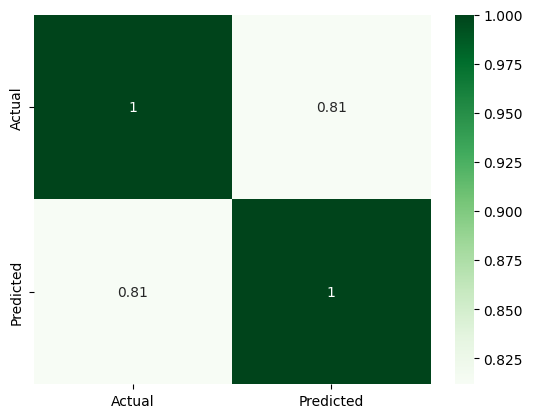

In [101]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

Performance

In [102]:
r2_score(y_test,y_pred)

0.6235533857147808